In [1]:
import numpy as np
import matplotlib.pyplot as plt
from signalprocessing.kernel_function import correlation, phaselockingvalue, fourier_corr
from numpy.linalg import norm

%matplotlib inline

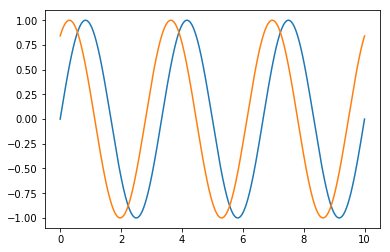

In [2]:
f0 = 0.3
phi = 1
t = np.linspace(0, 10, 10000)

x = np.sin(2 * np.pi * f0 * t)
y = np.sin(2 * np.pi * f0 * t + phi)

plt.plot(t, x);
plt.plot(t, y);

Here we show some similarity measures

**Correlation**

$$\text{covariance}(x,y) = \frac{C_{x,y}}{\sqrt{C_{x,x} C_{y,y}}}$$

In [3]:
data = np.vstack((x,y))

correlation(data), correlation(x,y), correlation(x,x)  # correlation

(array([[ 1.        ,  0.54026405],
        [ 0.54026405,  1.        ]]), array([[ 1.        ,  0.54026405],
        [ 0.54026405,  1.        ]]), array([[ 1.,  1.],
        [ 1.,  1.]]))

** Cross correlation **

We define the amplitude of the Fourier transform of $x, y$ as
\begin{align}
A_x = |\mathcal{F}(x)| \\
A_y = |\mathcal{F}(y)|
\end{align}
Then, we can easily express the average cross correlation, defined as follows
$$\text{avg cross correlation}(x,y) = \frac{A_x \cdot A_y}{{\| A_x\|_2 \| A_y\|_2 }} $$

In [4]:
from numpy.fft import fft

In [5]:
ax = np.abs(fft(x))
ay = np.abs(fft(y))

In [6]:
avg_xy = ax.dot(ay) / (norm(ax)*norm(ay))

print(avg_xy)

0.999999972579


The spectra of the two signals are equivalent, they have only a different in phase. The **fourier_corr** allows us to split the contributes

In [7]:
fourier_corr(data)

array([[ 1.        ,  0.99999997],
       [ 0.99999997,  1.        ]])

In [8]:
phaselockingvalue(data)

array([[ 1.    ,  0.3634],
       [ 0.3634,  1.    ]])

In [9]:
phaselockingvalue(np.vstack((x,x)))

array([[ 1.,  1.],
       [ 1.,  1.]])

In [10]:
phaselockingvalue(x,x)

1.0